In [128]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import matthews_corrcoef
import os
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

In [129]:
VALIDATION = True
DATASET = 2
train = pd.read_csv(os.path.join(os.getcwd(),f"Dataset_{DATASET}_Training.csv"),index_col=0)
test = pd.read_csv(os.path.join(os.getcwd(),f"Dataset_{DATASET}_Testing.csv"),index_col=0)


In [130]:
train.T.head() 

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_54670,gene_54671,gene_54672,gene_54673,gene_54674,gene_54675,CO: 3,CO: 4,CO: 5,CO: 6
Train_001,8.2843,8.7174,8.3019,11.8611,4.6883,9.8524,8.2301,4.8406,7.5667,8.4165,...,6.3546,7.2572,3.6080,3.9483,4.5200,4.5195,0.0,0.0,1.0,1.0
Train_002,9.0419,8.8729,8.4559,11.2112,5.7059,10.2263,7.9439,4.6463,6.1828,7.0852,...,4.9707,6.4847,5.1648,1.8369,3.8223,3.4288,0.0,0.0,1.0,1.0
Train_003,7.6171,8.3904,8.1184,11.0341,5.8050,9.5912,6.8044,4.0878,8.1184,7.3179,...,3.9571,6.2647,3.4216,4.7911,5.4910,3.8438,0.0,0.0,0.0,1.0
Train_004,9.6283,8.3840,9.9061,12.0571,5.1193,10.5774,8.1628,5.3257,5.6398,7.6829,...,4.6561,7.5776,6.2385,4.1413,5.3047,5.4693,0.0,0.0,0.0,1.0
Train_005,10.1735,9.1585,7.9649,11.0843,5.0119,8.7764,8.1379,3.6227,7.7334,7.6336,...,3.7007,3.8720,3.1052,5.4053,5.3599,2.8328,0.0,0.0,0.0,1.0


In [131]:
list(train.T.columns[-2:])

['CO: 5', 'CO: 6']

In [132]:
train.T.shape

(340, 54679)

In [133]:
test.T.shape

(214, 54675)

In [134]:
train = train.T
test = test.T

In [135]:
train_small = train.iloc[:,1:10]
train_small

ID_REF,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
Train_001,8.7174,8.3019,11.8611,4.6883,9.8524,8.2301,4.8406,7.5667,8.4165
Train_002,8.8729,8.4559,11.2112,5.7059,10.2263,7.9439,4.6463,6.1828,7.0852
Train_003,8.3904,8.1184,11.0341,5.8050,9.5912,6.8044,4.0878,8.1184,7.3179
Train_004,8.3840,9.9061,12.0571,5.1193,10.5774,8.1628,5.3257,5.6398,7.6829
Train_005,9.1585,7.9649,11.0843,5.0119,8.7764,8.1379,3.6227,7.7334,7.6336
...,...,...,...,...,...,...,...,...,...
Train_336,8.8300,9.9219,11.3773,4.6310,9.2819,8.1767,4.8860,6.2899,7.3783
Train_337,8.2785,9.2906,11.5624,5.2698,10.1612,8.2234,5.3162,3.4409,7.7313
Train_338,7.0345,8.2441,11.2367,7.5746,8.1249,7.4169,5.6091,4.3553,6.4326
Train_339,8.1774,8.8393,11.4165,4.7859,10.7674,8.4230,5.0015,5.4565,8.0588


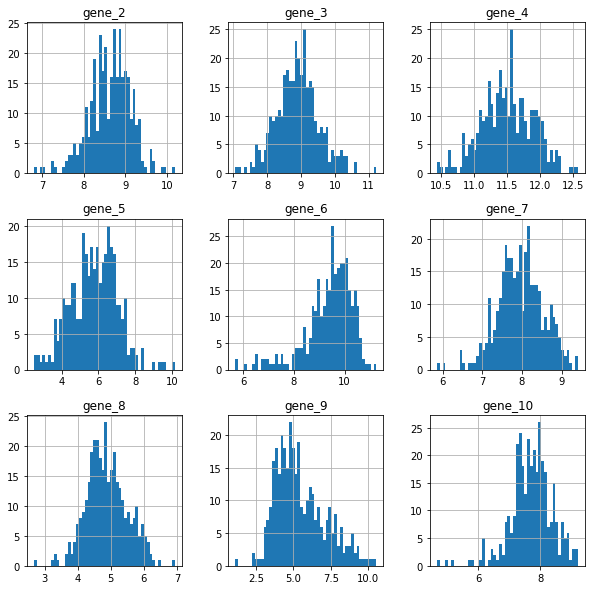

In [136]:
train_small.hist(bins = 50, figsize = (10,10))
plt.show()

In [137]:
test_cols = ['CO: 1','CO: 2']
if(DATASET == 2): test_cols = ['CO: 3','CO: 4','CO: 5','CO: 6']

scaler = preprocessing.StandardScaler()

In [138]:
X = train.drop(test_cols, axis=1, errors='ignore')
y = train[test_cols]
X_test = test.drop(test_cols, axis=1, errors='ignore')
scaler.fit(X)

StandardScaler()

In [139]:
scaledX = scaler.transform(X)
scaledXtest = scaler.transform(X_test)
scaledX.shape

(340, 54675)

In [140]:
X = scaledX
X_test = scaledXtest

In [141]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)
X_train.shape, X_val.shape
#y_train.head()

((238, 54675), (102, 54675))

In [142]:
np.array(y_train[test_cols[0]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [143]:
np.shape(y_train)

(238, 4)

In [144]:
for i in range(len(test_cols)):
    print(np.array(y_train[test_cols[i]]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

In [145]:
# model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

# model.fit(scaledX,y)
# predictions = model.predict(scaledXtest)
# model.score(scaledXtest,ytest)

In [146]:
predictions = []
for i in range(len(test_cols)):
    
    y_train_1 = np.array(y_train[test_cols[i]])
    y_val_1 = np.array(y_val[test_cols[i]])
    y_train_1 = y_train_1.reshape(y_train_1.shape[0],)
    y_val_1 = y_val_1.reshape(y_val_1.shape[0],)
    #X_test = test.drop(test_cols, axis=1, errors='ignore')

    #scaledX = scaler.transform(X)
    #scaledXtest = scaler.transform(Xtest)
    
    
    
    #estimator = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    model = AdaBoostClassifier()
    model.fit(X_train,y_train_1)
    predictions.append(model.predict(X_val))
    print(test_cols[i],model.score(X_val,y_val_1))

CO: 3 0.7450980392156863
CO: 4 0.8333333333333334
CO: 5 0.9313725490196079
CO: 6 0.5392156862745098


In [127]:
matthews_corrcoef(y_val['CO: 2'],predictions[1])

0.43855911358657207